In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
file_path = r"C:\Users\JITENDRA\Downloads\GWQ_2010-2018.xlsx"
df = pd.read_excel(file_path)
# Now you can work with the DataFrame `df` as needed
print(df.head(5))

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME            BASIN_NAME  \
0        Shoal  Bay– 15 No.         South_Andaman   
1  South Creek (Sundergarh)         South_Andaman   
2                

In [2]:
# Remove the starting one columns
df = df.iloc[:, 1:]

In [3]:
# Convert 'TDS' column to numeric, setting non-numeric values to NaN
df['TDS'] = pd.to_numeric(df['TDS'], errors='coerce')

In [4]:
df.shape

(85197, 13)

In [5]:
# Convert 'TDS' column to float
df['TDS'] = pd.to_numeric(df['TDS'], errors='coerce')
# Display the modified DataFrame
print(df.head())
df.isnull().sum()  # count the number of missing values in each column

  WRIS ID   LATITUDE  LONGITUDE SITE_TYPE           STATE_NAME  DISTRICT_NAME  \
0  W23881  11.866389  92.736111  Dug Well  Andaman And Nicobar  A & N Islands   
1  W38814  12.186944  92.791667  Dug Well  Andaman And Nicobar  A & N Islands   
2  W24095  12.503889  92.859167  Dug Well  Andaman And Nicobar  A & N Islands   
3  W24112  12.524722  92.970278  Dug Well  Andaman And Nicobar  A & N Islands   
4  W24098  12.508333  92.960556  Dug Well  Andaman And Nicobar  A & N Islands   

      TAHSIL_NAME       BLOCK_NAME                 SITE_NAME  \
0      Ferrargunj    South Andaman        Shoal  Bay– 15 No.   
1  Middle Andaman  Baratang Island  South Creek (Sundergarh)   
2  Middle Andaman       Mayabunder                 Bakultala   
3  Middle Andaman       Mayabunder                 Nimbutala   
4  Middle Andaman       Mayabunder            Padmanavapuram   

             BASIN_NAME                                       PROJECT_NAME  \
0         South_Andaman  Monitoring Of National Hy

WRIS ID              0
LATITUDE           281
LONGITUDE          281
SITE_TYPE            0
STATE_NAME           0
DISTRICT_NAME        1
TAHSIL_NAME        112
BLOCK_NAME         126
SITE_NAME            0
BASIN_NAME           0
PROJECT_NAME         0
year                 0
TDS              64071
dtype: int64

In [6]:
# Drop duplicates
df = df.drop_duplicates()
df = df.dropna()  #removes rows from the DataFrame df that contain missing values (NaN) in any column.
df.shape

(21013, 13)

In [7]:

# Calculate the Z-scores for the 'TDS' column
z_scores = (df['TDS'] - df['TDS'].mean()) / df['TDS'].std()

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]


# Print the modified DataFrame
print(df.head())


  WRIS ID   LATITUDE  LONGITUDE SITE_TYPE           STATE_NAME  DISTRICT_NAME  \
0  W23881  11.866389  92.736111  Dug Well  Andaman And Nicobar  A & N Islands   
1  W38814  12.186944  92.791667  Dug Well  Andaman And Nicobar  A & N Islands   
2  W24095  12.503889  92.859167  Dug Well  Andaman And Nicobar  A & N Islands   
3  W24112  12.524722  92.970278  Dug Well  Andaman And Nicobar  A & N Islands   
4  W24098  12.508333  92.960556  Dug Well  Andaman And Nicobar  A & N Islands   

      TAHSIL_NAME       BLOCK_NAME                 SITE_NAME  \
0      Ferrargunj    South Andaman        Shoal  Bay– 15 No.   
1  Middle Andaman  Baratang Island  South Creek (Sundergarh)   
2  Middle Andaman       Mayabunder                 Bakultala   
3  Middle Andaman       Mayabunder                 Nimbutala   
4  Middle Andaman       Mayabunder            Padmanavapuram   

             BASIN_NAME                                       PROJECT_NAME  \
0         South_Andaman  Monitoring Of National Hy

In [8]:
df = df[df['TDS'] != 0]  # remove zero value in tds attributes
df = df[df['TDS'] != 0.0]
# Remove rows with missing values in the 'TDS' and 'SITE_TYPE' columns
df = df.dropna(subset=['TDS', 'SITE_TYPE'])
df.shape

(13350, 13)

In [9]:
# Convesion formulae(latitude , longitude) degree, minute, second to coordinates
import re

def convert_coordinates(coord):
    if isinstance(coord, str):
        # Extract degrees, minutes, and seconds from the string
        degrees, minutes, *seconds = re.findall(r"\d+\.\d+|\d+", coord)
        
        # Convert degrees, minutes, and seconds to decimal values
        decimal_coord = float(degrees) + float(minutes) / 60
        if seconds:
            decimal_coord += float(seconds[0]) / 3600
        
        return decimal_coord
    else:
        return coord

# Convert latitude and longitude columns to decimal coordinates
df['LATITUDE'] = df['LATITUDE'].apply(convert_coordinates)
df['LONGITUDE'] = df['LONGITUDE'].apply(convert_coordinates)

# Print the updated DataFrame
print(df)

      WRIS ID   LATITUDE  LONGITUDE SITE_TYPE           STATE_NAME  \
0      W23881  11.866389  92.736111  Dug Well  Andaman And Nicobar   
1      W38814  12.186944  92.791667  Dug Well  Andaman And Nicobar   
2      W24095  12.503889  92.859167  Dug Well  Andaman And Nicobar   
3      W24112  12.524722  92.970278  Dug Well  Andaman And Nicobar   
4      W24098  12.508333  92.960556  Dug Well  Andaman And Nicobar   
...       ...        ...        ...       ...                  ...   
85192  W40943  22.510000  87.330000  Dug Well          West Bengal   
85193  W10716  22.180000  87.160000  Dug Well          West Bengal   
85194  W40944  22.580000  87.520000  Dug Well          West Bengal   
85195  W40945  22.470000  87.020000  Dug Well          West Bengal   
85196  W40946  22.610000  86.810000  Dug Well          West Bengal   

       DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0      A & N Islands      Ferrargunj    South Andaman   
1      A & N Islands  Middle Andaman  Baratan

In [10]:
# Assuming you have already loaded and processed the dataset

# Check the range of TDS values
tds_range = df['TDS'].describe()[['min', 'max']]
print(tds_range)

min        8.28
max    31525.00
Name: TDS, dtype: float64


In [11]:
# Define the bin edges for the clusters
bin_edges = [float('-inf'), 500, 1500, 2100,  float('inf')]

# Define the cluster labels
cluster_labels = ['cluster1', 'cluster2', 'cluster3', 'cluster4']

# Create a new column 'PH Cluster' with the cluster labels
df['TDS_Cluster'] = pd.cut(df['TDS'], bins=bin_edges, labels=cluster_labels, right=False)

# Print the DataFrame with the 'LATITUDE', 'LONGITUDE', and 'PH Cluster' columns
print(df[['LATITUDE', 'LONGITUDE', 'TDS_Cluster']])

# Print PH cluster vs count
cluster_counts = df['TDS_Cluster'].value_counts()
print(cluster_counts)

        LATITUDE  LONGITUDE TDS_Cluster
0      11.866389  92.736111    cluster1
1      12.186944  92.791667    cluster1
2      12.503889  92.859167    cluster1
3      12.524722  92.970278    cluster1
4      12.508333  92.960556    cluster1
...          ...        ...         ...
85192  22.510000  87.330000    cluster1
85193  22.180000  87.160000    cluster1
85194  22.580000  87.520000    cluster1
85195  22.470000  87.020000    cluster1
85196  22.610000  86.810000    cluster1

[13350 rows x 3 columns]
cluster1    6432
cluster2    5122
cluster4    1039
cluster3     757
Name: TDS_Cluster, dtype: int64


In [12]:
# Assuming you already have the data in a DataFrame called 'df'

# Convert latitude and longitude columns to numeric values
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'])
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'])

# Create a GeoDataFrame using latitude and longitude coordinates
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']))

In [13]:
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
states_data.head(5)

ST_NM                                           geometry
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.79420...
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...

In [14]:
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')
districts_data.head(5)

objectid statecode    statename state_ut distcode    distname  distarea  \
0         1        05  Uttarakhand    STATE      066    Nainital    4251.0   
1         2        05  Uttarakhand    STATE      060    Dehradun    3088.0   
2         3        05  Uttarakhand    STATE      064      Almora    3144.0   
3         4        05  Uttarakhand    STATE      065   Champawat    1766.0   
4         5        05  Uttarakhand    STATE      056  Uttarkashi    8016.0   

   totalpopul   totalhh  totpopmale  totpopfema    st_areasha     st_lengths  \
0    954605.0  191383.0    493666.0    460939.0  5.322546e+09  506182.695952   
1   1696694.0  347001.0    892199.0    804495.0  4.177236e+09  578188.681639   
2    622506.0  140577.0    291081.0    331425.0  4.140751e+09  463454.225766   
3    259648.0   53953.0    131125.0    128523.0  2.294297e+09  314508.010612   
4    330086.0   67602.0    168597.0    161489.0  1.085166e+10  786425.588972   

                                            geometry  
0  POLYGON ((79.52659 29.05543, 79.52550 29.05545...  
1  POLYGON ((77.87557 30.26052, 77.87467 30.26087...  
2  POLYGON ((79.28494 29.92735, 79.28495 29.92723...  
3  POLYGON ((80.12479 29.01308, 80.12481 29.01306...  
4  POLYGON ((78.92267 31.25333, 78.93106 31.26840...

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_592\3967074179.py:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))


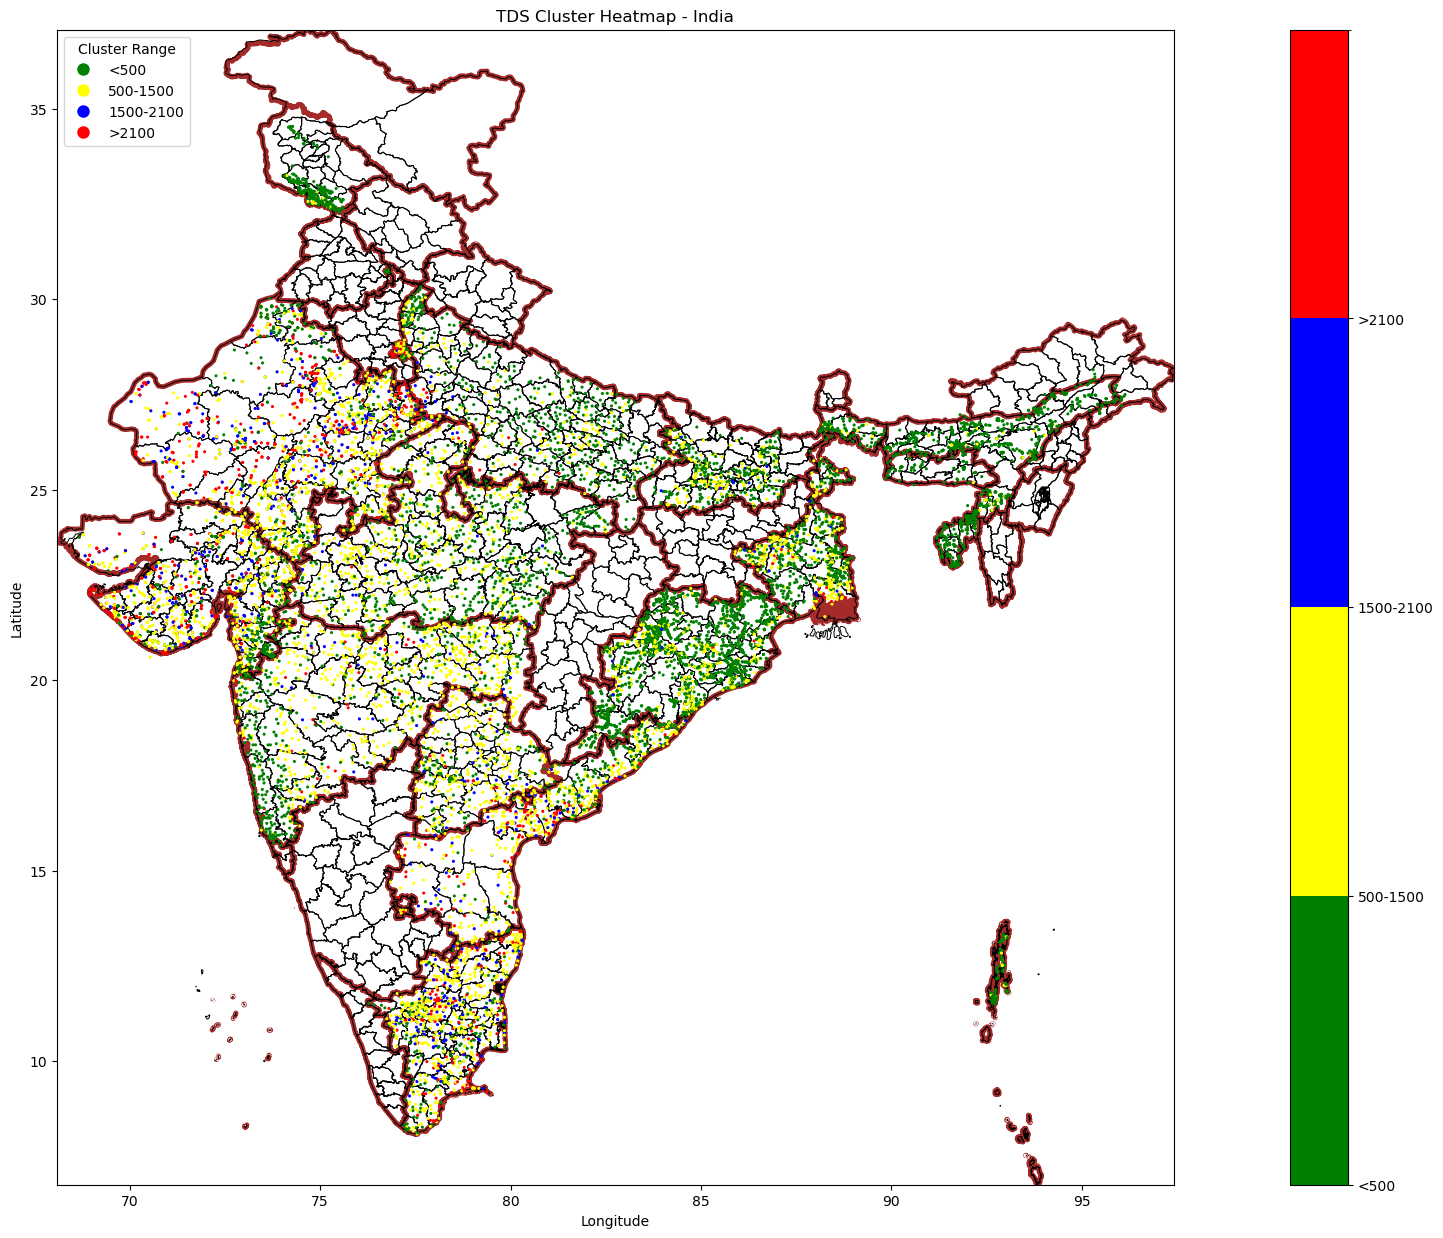

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Define the cluster ranges and corresponding colors
cluster_ranges = ['<500', '500-1500', '1500-2100', '>2100']
cluster_colors = [ 'green', 'yellow', 'blue', 'red']


# Create a color map for the clusters
color_map = mcolors.ListedColormap(cluster_colors)
color_boundaries = [i for i in range(len(cluster_ranges) + 1)]
color_norm = mcolors.BoundaryNorm(color_boundaries, len(cluster_ranges))

# Read the districts data
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Plotting the map with state boundaries
states_data.plot(ax=ax, edgecolor='brown', linewidth=3.5, facecolor='none')

# Plotting the district boundaries on top of the state boundaries
districts_data.plot(ax=ax, edgecolor='black', linewidth=0.7, facecolor='none')

# Plot the TDS heatmap with the specified color map
gdf.plot(column='TDS_Cluster', cmap=color_map, markersize=5, legend=True, ax=ax, norm=color_norm, edgecolor='none')

# Set plot title and axis labels
plt.title('TDS Cluster Heatmap - India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust axis limits
ax.set_xlim(states_data.total_bounds[0], states_data.total_bounds[2])
ax.set_ylim(states_data.total_bounds[1], states_data.total_bounds[3])

# Create a legend with cluster ranges and colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=range_) for
                   range_, color in zip(cluster_ranges, cluster_colors)]
ax.legend(handles=legend_elements, title='Cluster Range', loc='upper left')

# Create a dummy mappable for the colorbar
dummy_cmap = cm.ScalarMappable(cmap=color_map, norm=color_norm)
dummy_cmap.set_array([])

# Add color bar
cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))
cbar.set_ticklabels(cluster_ranges)

# Save the plot as a PNG image with high quality
plt.savefig('heatmap.png', dpi=300)
# Show the plot
plt.show()

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_592\3328015894.py:50: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))


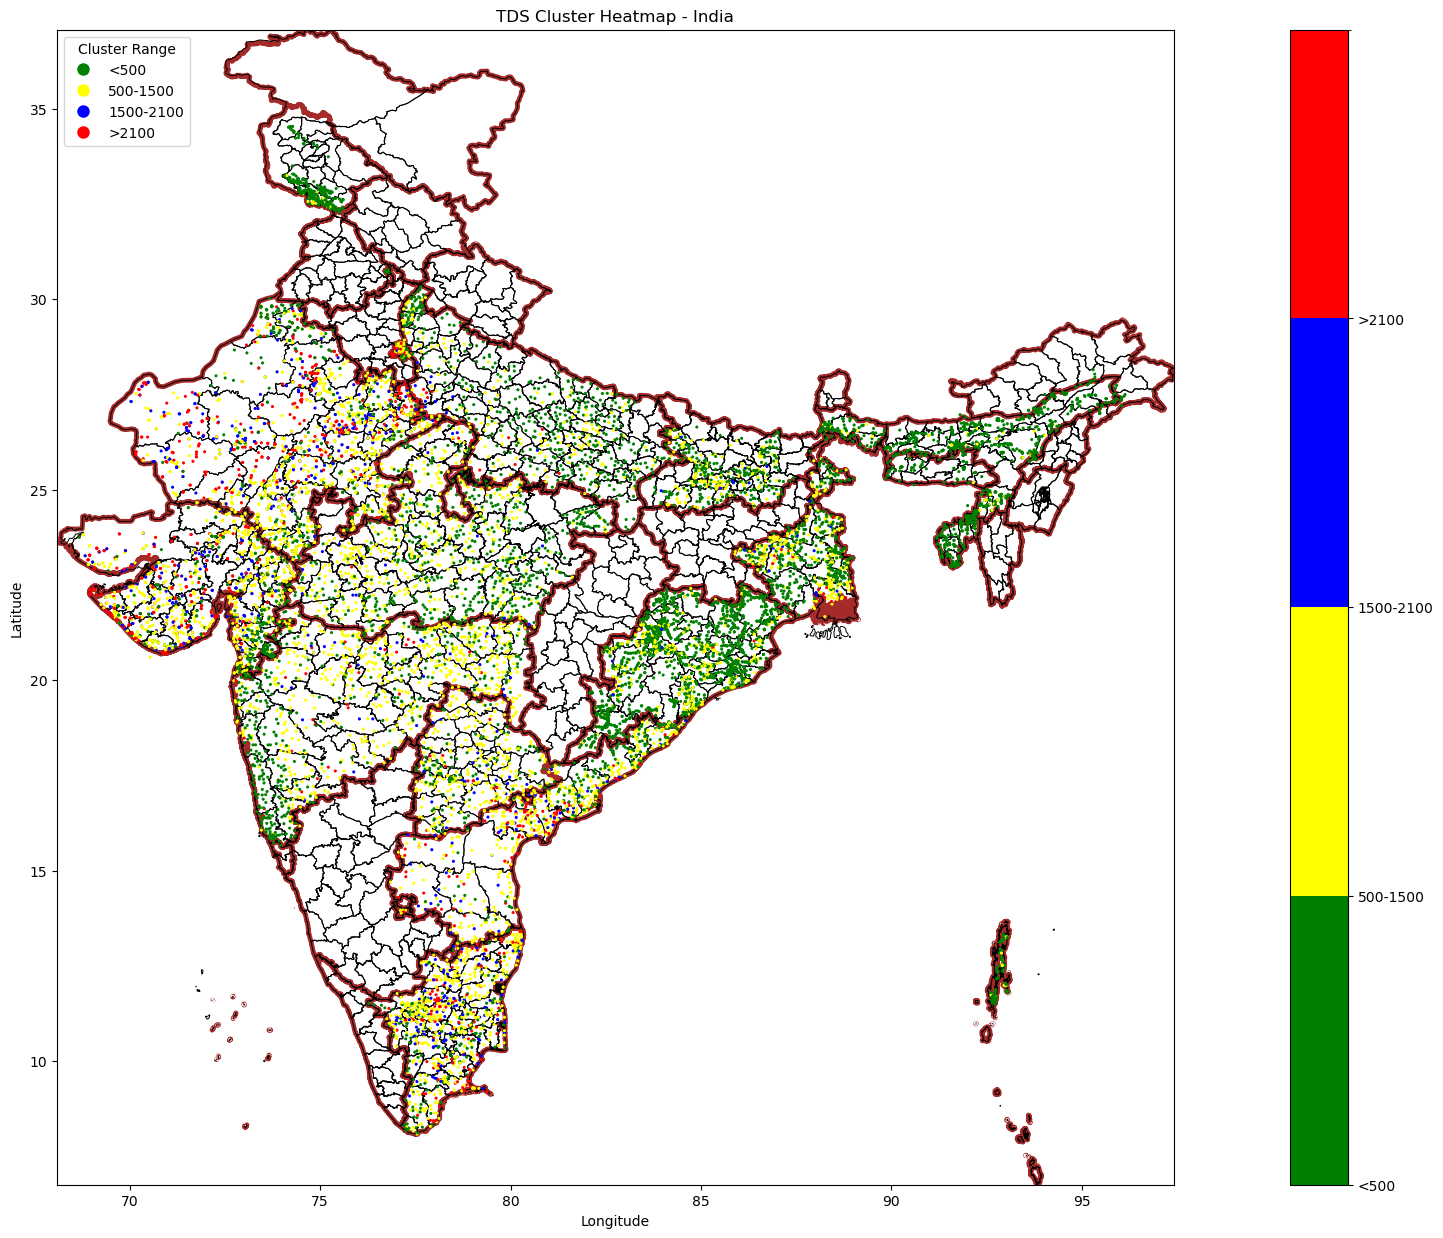

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import mplcursors

# Set the figure size
fig, ax = plt.subplots(figsize=(30, 15))

# Define the cluster ranges and corresponding colors
cluster_ranges = ['<500', '500-1500', '1500-2100', '>2100']
cluster_colors = ['green', 'yellow', 'blue', 'red']

# Create a color map for the clusters
color_map = mcolors.ListedColormap(cluster_colors)
color_boundaries = [i for i in range(len(cluster_ranges) + 1)]
color_norm = mcolors.BoundaryNorm(color_boundaries, len(cluster_ranges))

# Read the districts data
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Plotting the map with state boundaries
states_data.plot(ax=ax, edgecolor='brown', linewidth=3.5, facecolor='none')

# Plotting the district boundaries on top of the state boundaries
districts_data.plot(ax=ax, edgecolor='black', linewidth=0.7, facecolor='none')

# Plot the TDS heatmap with the specified color map
gdf.plot(column='TDS_Cluster', cmap=color_map, markersize=5, legend=True, ax=ax, norm=color_norm, edgecolor='none')

# Set plot title and axis labels
plt.title('TDS Cluster Heatmap - India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust axis limits
ax.set_xlim(states_data.total_bounds[0], states_data.total_bounds[2])
ax.set_ylim(states_data.total_bounds[1], states_data.total_bounds[3])

# Create a legend with cluster ranges and colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=range_) for
                   range_, color in zip(cluster_ranges, cluster_colors)]
ax.legend(handles=legend_elements, title='Cluster Range', loc='upper left')

# Create a dummy mappable for the colorbar
dummy_cmap = cm.ScalarMappable(cmap=color_map, norm=color_norm)
dummy_cmap.set_array([])

# Add color bar
cbar = plt.colorbar(dummy_cmap, cmap=color_map, norm=color_norm, boundaries=color_boundaries, ticks=range(len(cluster_ranges)))
cbar.set_ticklabels(cluster_ranges)

# Add the popup functionality
cursor = mplcursors.cursor(ax, hover=True)

# Format the information to display in the popup
popup_info = [
    'SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE', 'STATE_NAME', 'DISTRICT_NAME',
    'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME', 'BASIN_NAME', 'PROJECT_NAME', 'year', 'TDS'
]
popup_text = '\n'.join(f'{info}: {{' + info.lower() + '}' for info in popup_info)

# Update the cursor hover event to display the popup
@cursor.connect("add")
def on_add(sel):
    index = sel.target.index
    data = gdf.iloc[index]
    sel.annotation.set_text(popup_text.format(**data))

# Save the plot as a PNG image with high quality
plt.savefig('heatmap.png', dpi=300)

# Show the plot
plt.show()


In [16]:
import numpy as np
import pandas as pd

# Calculate the Z-scores for the 'TDS' column
z_scores = (df['TDS'] - df['TDS'].mean()) / df['TDS'].std()

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

if len(outlier_indices) > 0:
    # Remove outliers from the original DataFrame
    df_without_outliers = df.drop(df.index[outlier_indices])

    # Create a new DataFrame for outliers
    outliers_df = df.iloc[outlier_indices]

    # Print the DataFrame without outliers
    print("Modified DataFrame:")
    print(df_without_outliers.head())

    # Print the outliers DataFrame
    print("Outliers:")
    print(outliers_df.head())
else:
    print("No outliers found.")


Modified DataFrame:
  WRIS ID   LATITUDE  LONGITUDE SITE_TYPE           STATE_NAME  DISTRICT_NAME  \
0  W23881  11.866389  92.736111  Dug Well  Andaman And Nicobar  A & N Islands   
1  W38814  12.186944  92.791667  Dug Well  Andaman And Nicobar  A & N Islands   
2  W24095  12.503889  92.859167  Dug Well  Andaman And Nicobar  A & N Islands   
3  W24112  12.524722  92.970278  Dug Well  Andaman And Nicobar  A & N Islands   
4  W24098  12.508333  92.960556  Dug Well  Andaman And Nicobar  A & N Islands   

      TAHSIL_NAME       BLOCK_NAME                 SITE_NAME  \
0      Ferrargunj    South Andaman        Shoal  Bay– 15 No.   
1  Middle Andaman  Baratang Island  South Creek (Sundergarh)   
2  Middle Andaman       Mayabunder                 Bakultala   
3  Middle Andaman       Mayabunder                 Nimbutala   
4  Middle Andaman       Mayabunder            Padmanavapuram   

             BASIN_NAME                                       PROJECT_NAME  \
0         South_Andaman  Monit

In [17]:
# Assuming you have already loaded and processed the dataset

# Check the range of TDS values
tds_range = outliers_df['TDS'].describe()[['min', 'max']]
print(tds_range)

min     4296.5
max    31525.0
Name: TDS, dtype: float64


In [18]:
print(outliers_df.TDS)

1186     4472.00
1631     4584.00
1984     5517.00
2350     8511.00
2523     5627.00
          ...   
72710    5399.10
73224    5595.00
79385    4530.00
84858    5783.04
84897    4543.36
Name: TDS, Length: 237, dtype: float64


In [19]:
# Define the bin edges for the clusters, For drinking water K content is 0.1-10ppm
bin_edges = [float('-inf'), 5000, 10000, 15000, float('inf')]

# Define the cluster labels
cluster_labels = ['cluster11', 'cluster22', 'cluster33', 'cluster44']

# Create a new column 'PH Cluster' with the cluster labels
outliers_df['TDS_Cluster'] = pd.cut(outliers_df['TDS'], bins=bin_edges, labels=cluster_labels, right=False)

# Print the DataFrame with the 'LATITUDE', 'LONGITUDE', and 'PH Cluster' columns
print(outliers_df[['LATITUDE', 'LONGITUDE', 'TDS_Cluster']])

# Print PH cluster vs count
cluster_counts = outliers_df['TDS_Cluster'].value_counts()
print(cluster_counts)

        LATITUDE  LONGITUDE TDS_Cluster
1186   16.672778  82.151667   cluster11
1631   15.401389  78.308333   cluster11
1984   16.166667  80.333333   cluster22
2350   16.668889  80.398611   cluster22
2523   16.280278  81.132222   cluster22
...          ...        ...         ...
72710  12.916500  79.132500   cluster22
73224  18.970000  79.457778   cluster22
79385  27.485000  77.468333   cluster11
84858  22.270000  88.220000   cluster22
84897  22.170000  88.250000   cluster11

[237 rows x 3 columns]
cluster22    152
cluster11     63
cluster33     12
cluster44     10
Name: TDS_Cluster, dtype: int64


C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_592\2243925280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['TDS_Cluster'] = pd.cut(outliers_df['TDS'], bins=bin_edges, labels=cluster_labels, right=False)


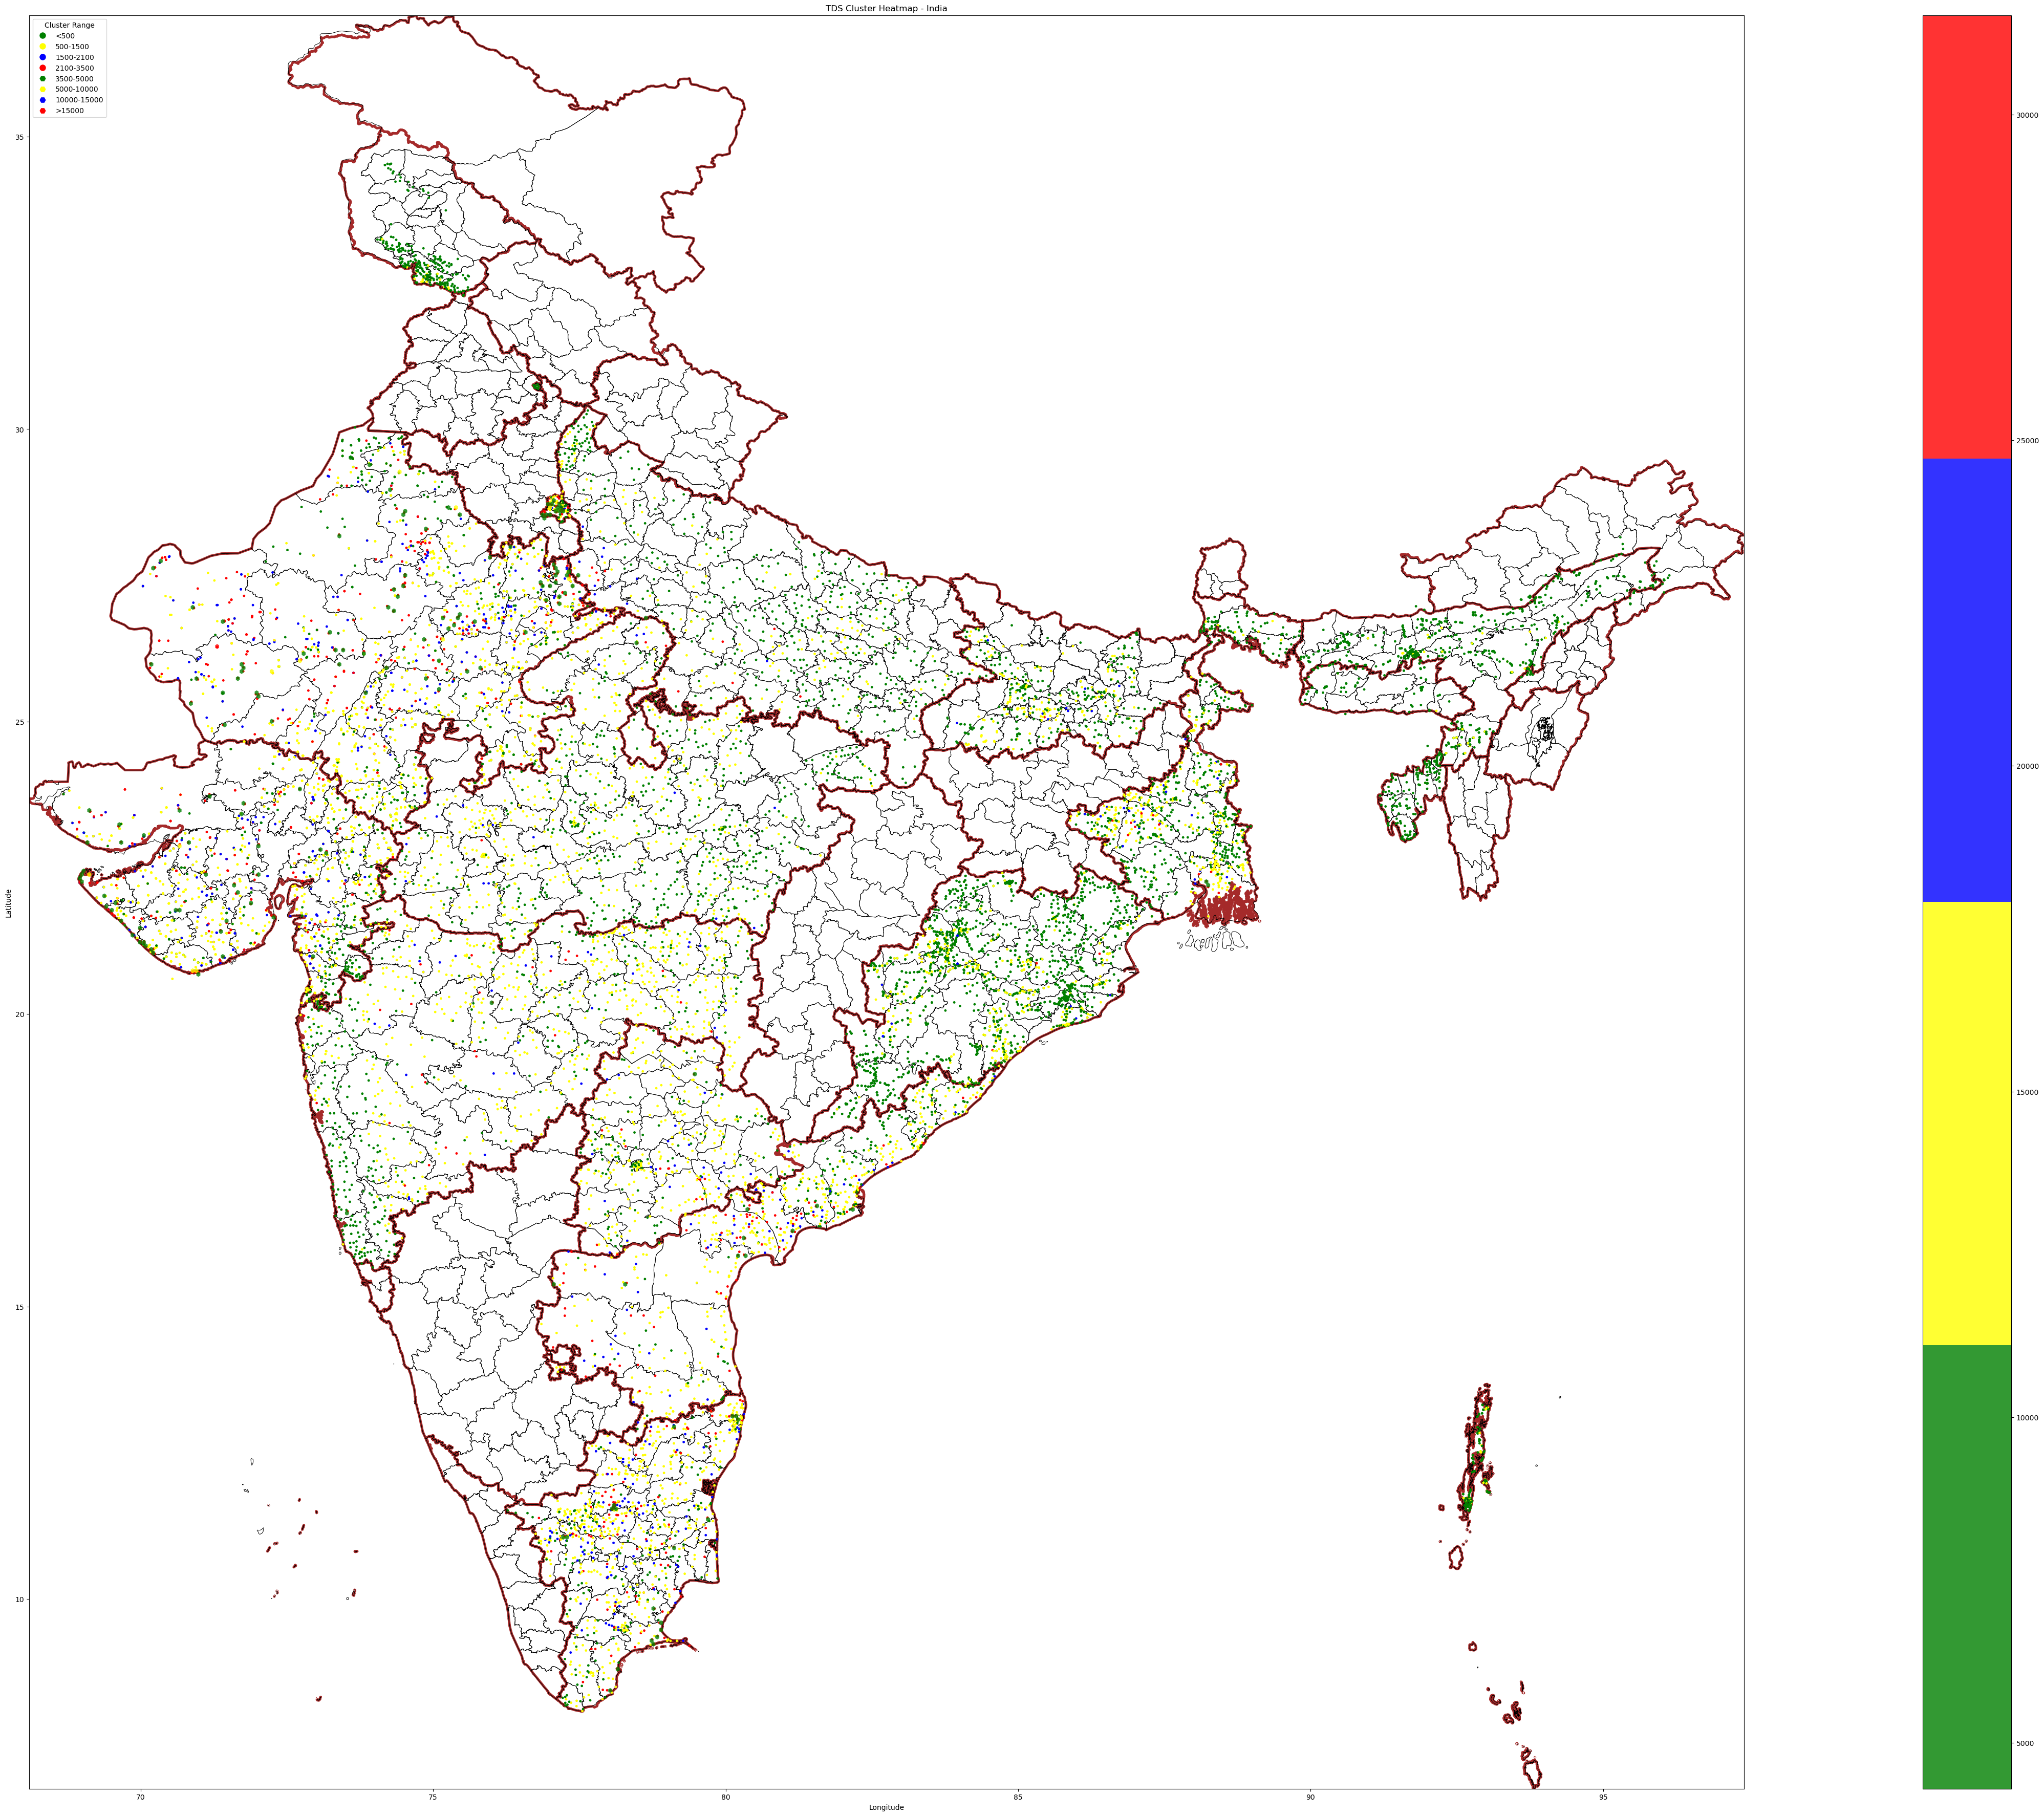

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


# Set the figure size
fig, ax = plt.subplots(figsize=(90, 45))

# Define the cluster ranges for TDS clusters
cluster_ranges = ['<500', '500-1500', '1500-2100', '2100-3500']

# Define the cluster ranges for outliers of TDS
outlier_cluster_ranges = ['3500-5000', '5000-10000', '10000-15000', '>15000']

# Create a color map for the TDS clusters
cluster_colors = ['Green', 'yellow', 'blue', 'Red']
color_map = mcolors.ListedColormap(cluster_colors)

# Create a color map for the outliers of TDS
outliers_cluster_colors = ['Green', 'yellow', 'blue', 'Red']
outliers_color_map = mcolors.ListedColormap(outliers_cluster_colors)

# Read the districts data
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Plotting the map with state boundaries
states_data.plot(ax=ax, edgecolor='brown', linewidth=3.5, facecolor='none')

# Plotting the district boundaries on top of the state boundaries
districts_data.plot(ax=ax, edgecolor='black', linewidth=0.7, facecolor='none')

# Plot the TDS clusters on the map
gdf.plot(column='TDS_Cluster', cmap=color_map, markersize=12, legend=False, ax=ax, edgecolor='none')

# Plot the outliers of TDS as a heatmap on the map
outliers_df.plot(kind='hexbin', x='LONGITUDE', y='LATITUDE', C='TDS', cmap=outliers_color_map, gridsize=300, ax=ax,
                 linewidths=0.2, alpha=0.8)

# Set plot title and axis labels
plt.title('TDS Cluster Heatmap - India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adjust axis limits
ax.set_xlim(states_data.total_bounds[0], states_data.total_bounds[2])
ax.set_ylim(states_data.total_bounds[1], states_data.total_bounds[3])

# Create a legend with cluster ranges and colors for TDS clusters
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=color, label=range_) for
                   range_, color in zip(cluster_ranges, cluster_colors)]
ax.legend(handles=legend_elements, title='Cluster Range', loc='upper left')
legend_elements += [plt.Line2D([0], [0], marker='H', color='w', markersize=10, markerfacecolor=color, label=range_)
                    for range_, color in zip(outlier_cluster_ranges, outliers_cluster_colors)]
ax.legend(handles=legend_elements, title='Cluster Range', loc='upper left')
# Save the plot as a PNG image with high quality
plt.savefig('heatmap.png', dpi=300)

# Show the plot
plt.show()


In [21]:
print(df['year'].nunique())


3


In [22]:
print("Number of years:", len(df['year'].unique()))
print("Years:", df['year'].unique())


Number of years: 3
Years: [2018 2016 2017]
